In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import utils
import numpy as np
%matplotlib inline

In [2]:
def plotloss(valid_loss, train_loss, title,output_filename,valid_step, xlabel='', ylabel=''):
    fig = plt.figure(num=None, figsize=(8, 6), edgecolor='k')
    
    # plotting training and val together requires they have same size
    y1 = np.array(valid_loss)
    y2 = np.zeros(len(train_loss)//valid_step)
    for i in range(len(train_loss)//valid_step):
        y2[i] = train_loss[valid_step*i]
        
    plt.plot(y1,'r')
    plt.plot(y2,'g')
    
    plt.gca().set_ylim([1.5,3.5])
    
    plt.title(title)
    plt.legend(('valid_loss', 'train_loss'),loc='upper right')
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.tight_layout()
    
    fig.savefig(output_filename)

In [3]:
files = {"gru1024" : "gru_losses1024.pkl",
         "lstm1024" : "losses.pkl"}

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

In [5]:
gru1024_trainval = unpickle(files["gru1024"])
gru1024_train = gru1024_trainval["losses_train"]
gru1024_val = gru1024_trainval["losses_val"]


lstm1024_trainval = unpickle(files["lstm1024"])
lstm1024_train = lstm1024_trainval["losses_train"]
lstm1024_val = lstm1024_trainval["losses_val"]

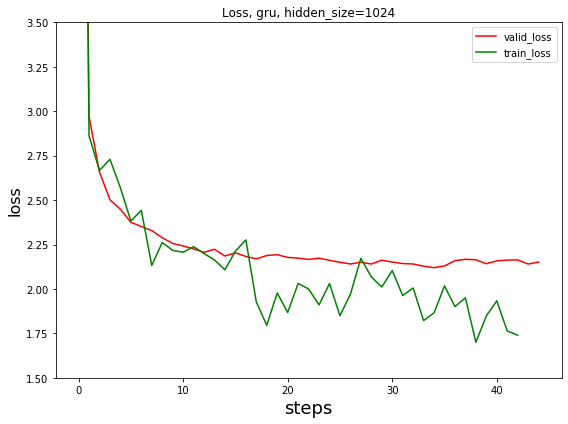

In [7]:
valid_step = 200

plotloss(gru1024_val,
        gru1024_train,
        'Loss, gru, hidden_size=1024',
        'plot_val_1024.png',
        valid_step,
        xlabel='steps',
        ylabel='loss')


# plotloss(lstm1024_val,
#         lstm1024_train,
#         'Loss, validation set, rnn_state_size=1024',
#         'plot_val_1024.png',
#         valid_step,
#         xlabel='steps (batches)',
#         ylabel='loss')